In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.morphology import disk, opening, skeletonize
from scipy import ndimage

In [ ]:
"""
Reading the image
Matlab steps translated:
O = imread('test.png');
O = mean(O,3);
I = imgaussfilt(O,1);
"""
# Maybe switch to imageio imread and the to the scipy gaussian filter
# Just don't know how to use the scipy one yet
# Because cv2 reads an image as BGR instead of RBG and I don't know if that is
# the reason the overlay is kind of ugly.
#O = cv2.imread("img1.png")
#I = cv2.GaussianBlur(O, (0, 0), sigmaX=1, sigmaY=1)
O = Image.open("testfolder/modern-w-crossover.tif")
O = np.array(O)
print(f"O.shape: {O.shape}")
I = ndimage.gaussian_filter(O, sigma=1)

<class 'numpy.ndarray'>


In [3]:
# Linar algebra stuff
# 1st try - Fixed tresholds
row_mask = np.sum(I, axis=1) < 110000
print(f'row_mask:\n {row_mask.shape}')
print(f'row-like row_mask:\n {row_mask[:, np.newaxis].shape}')
col_mask = np.sum(I, axis=0) < 50000
print(f'col_mask:\n {col_mask.shape}')
print(f'column-like col_mask:\n {col_mask[np.newaxis, :].shape}')

# Combining the masks with ones
mask_combined = (row_mask[:, np.newaxis] | col_mask[np.newaxis, :])

# K = max(O,max(O(:))*(ones(size(I,1),1)*(sum(I,1) < 50000) | (sum(I,2) < 110000)*ones(1,size(I,2))));
K = np.maximum(O, np.max(O) * mask_combined)

row_mask:
 (31076, 3)
row-like row_mask:
 (31076, 1, 3)
col_mask:
 (1806, 3)
column-like col_mask:
 (1, 1806, 3)


In [4]:
# Morphological operations
se = disk(10)
J = opening(K.mean(axis=2), se)
S = skeletonize(J<128)

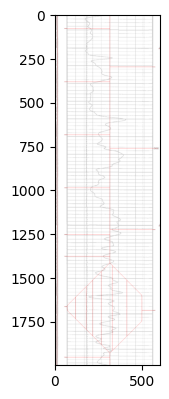

In [6]:
# Define the region of interest (ROI)
x_start, x_end = 100, 700  # Define the x-axis range
y_start, y_end = 6000, 8000  # Define the y-axis range

# Slice the image to get the ROI
roi = O[y_start:y_end, x_start:x_end]
s_roi = S[y_start:y_end, x_start:x_end]

# Create the overlay image (3 channels for RGB)
overlay = np.zeros(roi.shape[:2] + (3,), dtype=np.uint8) + 255  # White background
overlay[s_roi] = [255, 0, 0]  # Set skeleton pixels to red

# Display the ROI with the overlay
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 4)
# Display the overlay (skeleton in red)
plt.imshow(overlay)

# Display the original ROI with some transparency
plt.imshow(roi, cmap="gray", alpha=0.2)

# Set axis properties
plt.axis("image")
plt.show()